In [58]:
import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='ticks')
sns.set_context('paper')

### OD DATA

tracts with at least 1 trip

In [2]:
od_agg = pd.read_csv('../GENERATED-DATA/od_agg_by_tract.csv')
od_agg.shape

(12425, 40)

### CRIME DATA

all tracts

In [3]:
crime_agg = pd.read_csv('../GENERATED-DATA/crime_agg_by_tract.csv')
crime_agg.shape

(18953, 2)

In [33]:
crime_agg.CRIMES.describe()

count    18953.000000
mean        24.819501
std         82.293928
min          0.000000
25%          2.000000
50%          9.000000
75%         23.000000
max       3673.000000
Name: CRIMES, dtype: float64

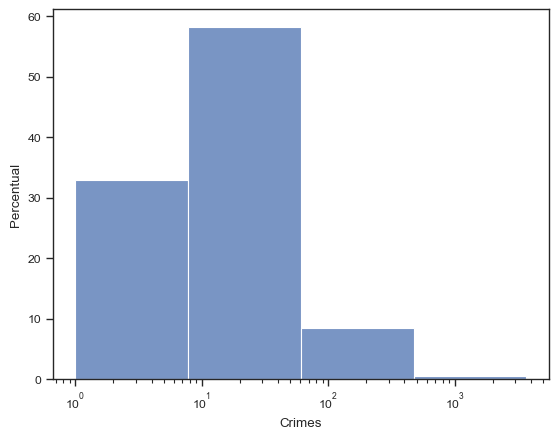

In [47]:
ax = sns.histplot(
    data=crime_agg,
    x='CRIMES',
    binwidth=1,
    log_scale=True,
    stat='percent',
)

ax.set_xlabel('Crimes')
ax.set_ylabel('Percentual');

### CENSUS DATA

tracts with any data

In [148]:
census = pd.read_csv('../GENERATED-DATA/census_by_tract.csv')
census.shape

(18363, 37)

### TRACTS

all tracts

In [127]:
sp_geo = gpd.read_file("../CENSO-2010/sp_setores_censitarios.zip")

In [130]:
sp_geo = sp_geo.astype({'CD_GEOCODI': 'int64'})
sp_geo = sp_geo.query('NM_MUNICIP == "SÃO PAULO"')

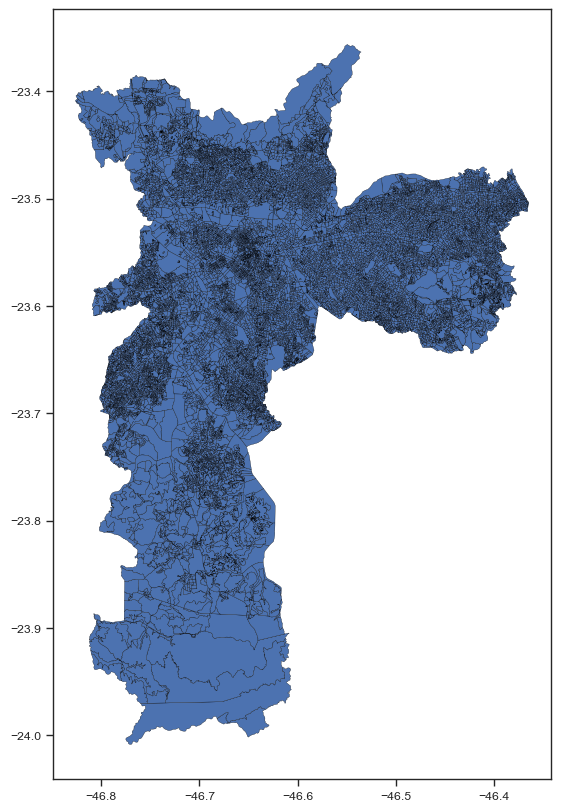

In [133]:
sp_geo.plot(
    edgecolor='black',
    linewidth=0.2, 
    figsize=(10, 10)
)
plt.show()

### Agg DATA by GEOCODI

In [149]:
df = sp_geo.merge(od_agg, left_on='CD_GEOCODI', right_on='CD_GEOCODI', how='left')
df = df.merge(crime_agg, left_on='CD_GEOCODI', right_on='CD_GEOCODI', how='left')
df = df.merge(census, left_on='CD_GEOCODI', right_on='CD_GEOCODI', how='left')

In [152]:
df = (
    df
    .drop(columns=[
        'ID',
        'CD_GEOCODI',
        'TIPO',
        'CD_GEOCODS',
        'NM_SUBDIST',
        'CD_GEOCODD',
        #'NM_DISTRIT',
        'CD_GEOCODM',
        'NM_MUNICIP',
        'NM_MICRO',
        'NM_MESO',
        'CD_GEOCODB',
        'NM_BAIRRO',
        'ID1',
    ])
    .rename(columns={
        'NM_DISTRIT': 'DISTRITO',
    })
)
df.columns

Index(['DISTRITO', 'geometry', 'idade', 'grau_ins', 'vl_ren_i',
       'sexo_Masculino', 'estuda_2º grau/ Médio', 'estuda_Creche/ Pré-escola',
       'estuda_Não', 'estuda_Outros', 'estuda_Superior/ Universitário',
       'cd_ativi_Dona de Casa', 'cd_ativi_Em Licença Médica',
       'cd_ativi_Estudante', 'cd_ativi_Faz Bico', 'cd_ativi_Nunca Trabalhou',
       'cd_ativi_Sem Trabalho', 'cd_ativi_Tem Trabalho Regular',
       'co_ren_i_Não tem renda', 'co_ren_i_Tem renda', 'motivo_o_Compras',
       'motivo_o_Escola/Educação', 'motivo_o_Médico/Dentista/Saúde',
       'motivo_o_Procurar Emprego', 'motivo_o_Recreação/Visitas/Lazer',
       'motivo_o_Refeição', 'motivo_o_Residência',
       'motivo_o_Trabalho Comércio', 'motivo_o_Trabalho Indústria',
       'motivo_o_Trabalho Serviços', 'motivo_d_Compras',
       'motivo_d_Escola/Educação', 'motivo_d_Médico/Dentista/Saúde',
       'motivo_d_Procurar Emprego', 'motivo_d_Recreação/Visitas/Lazer',
       'motivo_d_Refeição', 'motivo_d_Residênci

In [156]:
df.isna().mean().mean()

0.18927319536721735

In [157]:
# save geojson
df.to_file('../GENERATED-DATA/od_crime_census_by_tract.geojson', driver='GeoJSON')